# Nx versus T and OA

In [1]:
%load_ext autoreload

%autoreload 2

In [2]:
from pathlib import Path

from bs_fdbck.util.BSOA_datamanip import ds2df_inc_preprocessing
from bs_fdbck.util.collocate.collocateLONLAToutput import CollocateLONLATout
from bs_fdbck.util.collocate.collocate_echam_salsa import CollocateModelEcham
import useful_scit.util.log as log

from bs_fdbck.util.plot.BSOA_plots import make_cool_grid, plot_scatter

log.ger.setLevel(log.log.INFO)
import time
import xarray as xr
import matplotlib.pyplot as plt

 from pathlib import Path 
 Path(path).mkdir(exist_ok=True, parents=True)
/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/bs_fdbck/data_info/area_defs.csv
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
plot_path = Path('Plots')

In [4]:
def make_fn_eval(case,_type):
    #_x = v_x.split('(')[0]
    #_y = v_y.split('(')[0]
    f = f'evalNX_echam_noresm_{case}_{_type}.png'
    return plot_path /f

In [5]:

import numpy as np



In [6]:
plot_path = Path('Plots')

In [7]:
def make_fn_scat(case, v_x, v_y):
    _x = v_x.split('(')[0]
    _y = v_y.split('(')[0]
    f = f'scat_all_years_echam_noresm_{case}_{_x}_{_y}.png'
    return plot_path /f

In [8]:
plot_path.mkdir(exist_ok=True, parents=True)

# Load observational data: 

In [9]:
import pandas as pd

In [10]:
from bs_fdbck.constants import measurements_path

In [11]:
fn = measurements_path /'SourceData_Yli_Juuti2021.xls'

df_hyy_1 = pd.read_excel(fn, sheet_name=0, header=2, usecols=range(6))

df_hyy_1.head()

df_hyy_1['date'] = df_hyy_1.apply(lambda x: f'{x.year:.0f}-{x.month:02.0f}-{x.day:02.0f}', axis=1)

df_hyy_1['date'] = pd.to_datetime(df_hyy_1['date'] )



In [12]:
fn = measurements_path /'SourceData_Yli_Juuti2021.xls'

df_hyy_2 = pd.read_excel(fn, sheet_name=2, header=2, usecols=range(6))

df_hyy_2.head()

df_hyy_2['date'] = df_hyy_2.apply(lambda x: f'{x.year:.0f}-{x.month:02.0f}-{x.day:02.0f}', axis=1)

df_hyy_2['date'] = pd.to_datetime(df_hyy_2['date'] )

df_hyy_2

df_hyy_2['date'] = df_hyy_2.apply(lambda x: f'{x.year:.0f}-{x.month:02.0f}-{x.day:02.0f}', axis=1)

df_hyy_2['date'] = pd.to_datetime(df_hyy_2['date'] )

df_hyy_2 = df_hyy_2.set_index('date')

In [13]:
df_hyy_2

,year,month,day,T (degree C),AOD_340 nm,AOD_500 nm
date,,,,,,
2012-07-02,2012,7,2,16.753083,0.117652,0.065783
2012-07-03,2012,7,3,17.366916,0.148389,0.082933
2012-07-04,2012,7,4,18.099667,0.144905,0.078666
2012-07-06,2012,7,6,18.627832,0.173471,0.087554
2012-07-20,2012,7,20,13.770333,0.149718,0.090444
...,...,...,...,...,...,...
2018-08-08,2018,8,8,20.297500,0.084738,0.047252
2018-08-16,2018,8,16,17.330334,0.229233,0.149357
2018-08-19,2018,8,19,15.192917,0.088741,0.056444


In [14]:
df_hyy_1 = df_hyy_1.set_index('date')

In [15]:
df_hyy_1 = pd.merge(df_hyy_1,df_hyy_2[['AOD_340 nm','AOD_500 nm']], left_index=True, right_index=True,how="outer",)

In [16]:
df_hyy_1

,year,month,day,T (degree C),OA (microgram m^-3),N100 (cm^-3),AOD_340 nm,AOD_500 nm
date,,,,,,,,
2012-07-01,2012,7,1,17.308417,3.014541,781.245471,NaN,NaN
2012-07-02,2012,7,2,16.753084,1.697459,635.103339,0.117652,0.065783
2012-07-03,2012,7,3,17.366917,2.350536,745.212064,0.148389,0.082933
2012-07-04,2012,7,4,18.099667,2.118566,734.009356,0.144905,0.078666
2012-07-05,2012,7,5,19.267666,3.413631,1019.238450,NaN,NaN
...,...,...,...,...,...,...,...,...
2018-08-27,2018,8,27,12.378417,1.065071,423.684130,NaN,NaN
2018-08-28,2018,8,28,13.056500,1.517197,513.888488,NaN,NaN
2018-08-29,2018,8,29,15.028000,2.148551,720.768715,0.211001,0.150221


In [18]:
import datetime

In [19]:
from bs_fdbck.util.EBAS_data import get_ebas_dataset_Nx_daily_JA_median_df, get_ebas_dataset_with_Nx

x_list = [50, 100, 200]


#ds_ebas_Nx = get_ebas_dataset_with_Nx()

ds_ebas_Nx= get_ebas_dataset_with_Nx(x_list=x_list)#x_list=x_list,station=station, path_ebas=path_ebas)#x_list = [90,100,110,120])

df_ebas_Nx = ds_ebas_Nx[[f'N{x:d}' for x in x_list]].to_dataframe().resample('h').mean()
df_ebas_Nx['JA'] = (df_ebas_Nx.index.month == 7) | (df_ebas_Nx.index.month == 8)
df_ebas_Nx = df_ebas_Nx[df_ebas_Nx['JA']] 

df_ebas_Nx.index = df_ebas_Nx.index + datetime.timedelta(hours=3)

Importing files: 
[PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/EBAS/raw_data/SMR/FI0050R.20120101000000.20181205100800.dmps.particle_number_size_distribution.pm10.1y.1h.FI03L_UHEL_DMPS_HYY_01.FI03L__TRY_TDMPS.lev2.nc'), PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/EBAS/raw_data/SMR/FI0050R.20130101000000.20220222151057.dmps.particle_number_size_distribution.pm10.1y.1h.FI03L_UHEL_DMPS_HYY_01.FI03L__TRY_TDMPS.lev2.nc'), PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/EBAS/raw_data/SMR/FI0050R.20140101000000.20220222151057.dmps.particle_number_size_distribution.pm10.1y.1h.FI03L_UHEL_DMPS_HYY_01.FI03L__TRY_TDMPS.lev2.nc'), PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/EBAS/raw_data/SMR/FI0050R.20150101000000.20220222151057.dmps.particle_number_size_distribution.pm10.1y.1h.FI03L_UHEL_DMPS_HYY_01.FI03L__TRY_TDMPS.lev2.nc'), PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/EBAS/raw_data/SMR/FI0050R.20160101000000.2022022

In [20]:
fn = measurements_path /'SourceData_Yli_Juuti2021.xls'

df_hyy_1y = pd.read_excel(fn, sheet_name=0, header=2, usecols=range(7,12),nrows=7)

df_hyy_1y.head()
df_hyy_1y= df_hyy_1y.rename({'year.1':'year',
                            'T (degree C).1':'T (degree C)',
                             'OA (microgram m^-3).1':'OA (microgram m^-3)',
                             'N100 (cm^-3).1':'N100 (cm^-3)'
                            }, axis=1)
#df_hyy_1y['year'] = pd.to_datetime(df_hyy_1y['year'].apply(x:str(x)))

df_hyy_1y

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/pandas/io/excel/_base.py:1272: FutureWarning: Defining usecols with out of bounds indices is deprecated and will raise a ParserError in a future version.
  return self._reader.parse(


,year,T (degree C),OA (microgram m^-3),N100 (cm^-3)
0,2012,14.819834,2.286611,485.015920
1,2013,16.061833,2.266324,458.851509
2,2014,18.469334,4.102861,706.239261
3,2015,14.949500,2.167607,499.026618
4,2016,13.959500,1.693031,418.417730
5,2017,13.619333,1.845648,409.297699
6,2018,17.848833,3.366803,770.183131


In [21]:
df_hyy_1

,year,month,day,T (degree C),OA (microgram m^-3),N100 (cm^-3),AOD_340 nm,AOD_500 nm
date,,,,,,,,
2012-07-01,2012,7,1,17.308417,3.014541,781.245471,NaN,NaN
2012-07-02,2012,7,2,16.753084,1.697459,635.103339,0.117652,0.065783
2012-07-03,2012,7,3,17.366917,2.350536,745.212064,0.148389,0.082933
2012-07-04,2012,7,4,18.099667,2.118566,734.009356,0.144905,0.078666
2012-07-05,2012,7,5,19.267666,3.413631,1019.238450,NaN,NaN
...,...,...,...,...,...,...,...,...
2018-08-27,2018,8,27,12.378417,1.065071,423.684130,NaN,NaN
2018-08-28,2018,8,28,13.056500,1.517197,513.888488,NaN,NaN
2018-08-29,2018,8,29,15.028000,2.148551,720.768715,0.211001,0.150221


In [22]:
df_hyy_1y['year'] = df_hyy_1y['year'].apply(lambda x:f'{x:.0f}')

df_hyy_1y['date'] = df_hyy_1y['year']
df_hyy_1y = df_hyy_1y.set_index('date')

In [23]:
df_hyy_1['date'] = df_hyy_1.apply(lambda x: f'{x.year:.0f}-{x.month:02.0f}-{x.day:02.0f}', axis=1)

df_hyy_1['date'] = pd.to_datetime(df_hyy_1['date'] )


df_hyy_1 = df_hyy_1.set_index('date')

In [24]:
df_hyy_1.index = df_hyy_1.index.rename('time') 

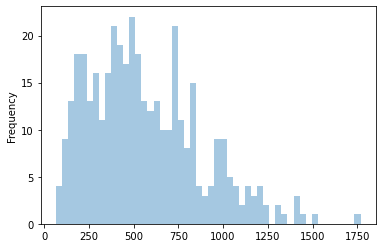

In [25]:
df_hyy_1['N100 (cm^-3)'].plot.hist(bins=50, alpha=0.4, label='obs')

plt.show()



## Why is my method 20% off their method? Is it integration?

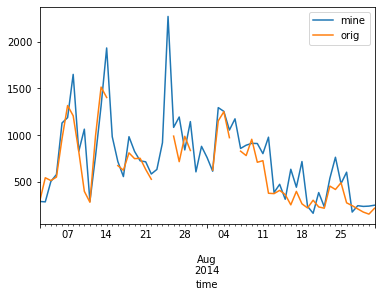

1.2336971851444671


In [26]:

df_joint_hyy = pd.merge(df_ebas_Nx, df_hyy_1, left_index=True, right_index=True)
(df_joint_hyy['N100']).loc['2014-07':'2014-09'].plot(label='mine')
(df_joint_hyy['N100 (cm^-3)']).loc['2014-07':'2014-09'].plot(label='orig')
plt.legend()
plt.show()



print(df_joint_hyy['N100'][df_joint_hyy['N100 (cm^-3)'].notnull()].mean()/df_joint_hyy['N100 (cm^-3)'].mean())

# Read in model data:

## Settings:

In [27]:
nr_of_bins = 5
maxDiameter = 39.6  #    23.6 #e-9
minDiameter = 5.0  # e-9
history_field='.h1.'

In [28]:
from_t = '2012-01-01'
to_t = '2015-01-01'

In [29]:
from_t2 = '2015-01-01'
to_t2 = '2019-01-01'

## Cases:

In [30]:
models = ['ECHAM-SALSA','NorESM']

di_mod2cases = dict()
#for mod in models:
#    di_mod2cases[mod]=dict()

In [31]:
dic_mod_ca = dict()
dic_df_mod_case = dict()
dic_dfsm_mod_case = dict()

### LOAD ECHAM SALSA

In [32]:



case_name = 'SALSA_BSOA_feedback'
case_name_echam = 'SALSA_BSOA_feedback'
time_res = 'hour'
space_res='locations'
model_name='ECHAM-SALSA'


case_mod = case_name#'OsloAero_intBVOC_f19_f19_mg17_fssp'
cases_echam = [case_name]
di_mod2cases[model_name]=cases_echam

## Settings:

In [33]:
from_t = '2012-01-01'
to_t = '2019-01-01'

In [34]:
case_mod = case_name#'OsloAero_intBVOC_f19_f19_mg17_fssp'
cases_echam = [case_name]

In [35]:
 
log.ger.info(f'TIMES:****: {from_t} {to_t}')

2022-05-13 11:10:05,234 useful_scit  INFO     TIMES:****: 2012-01-01 2019-01-01


2022-05-13 11:10:05,234 useful_scit  INFO     TIMES:****: 2012-01-01 2019-01-01


## Variables

In [36]:
varl =[
      'apm',
'geom',
'airdens',
'tempair',
'uw',
'vw',
'ccn02',
'ccn10',
'cod',
'cwp',
'ceff',
'ceff_ct',
'lcdnc',
'lcdnc_ct',
'clfr',
'cl_time',
'aot550nm',
'aot865nm',
'ang550865',
'up_sw',
'up_sw_cs',
'up_sw_noa',
'up_sw_cs_noa',
'up_lw',
'up_lw_cs',
'up_lw_noa',
'up_lw_cs_noa',
'mmrtrN500',
'mmrtrN250',
'mmrtrN200',
'mmrtrN100',
'mmrtrN50',
'mmrtrN3',
'oh_con',
'emi_monot_bio',
'emi_isop_bio',
'SO2_gas',
'APIN_gas',
'TBETAOCI_gas',
'BPIN_gas',
'LIMON_gas',
'SABIN_gas',
'MYRC_gas',
'CARENE3_gas',
'ISOP_gas',
'VBS0_gas',
'VBS1_gas',
'VBS10_gas',
'ORG_mass',
      
      
      ] 

In [37]:
for case_name in cases_echam:
    varlist = varl
    c = CollocateLONLATout(case_name, from_t, to_t,
                           True,
                           'hour',
                           model_name=model_name
                          # history_field=history_field
                          )
    if c.check_if_load_raw_necessary(varlist ):
        time1 = time.time()
        a = c.make_station_data_merge_monthly(varlist)
        print(a)

        time2 = time.time()
        print('DONE : took {:.3f} s'.format( (time2-time1)))
    else:
        print('UUUPS')

UUUPS


In [38]:
dic_ds = dict()
for ca in cases_echam:
    c = CollocateLONLATout(ca, from_t, to_t,
                           True,
                           'hour',
                           model_name=model_name
                          )
                          # history_field=history_field)
    ds = c.get_collocated_dataset(varl)
    if 'location' in ds.coords:
        ds = ds.rename({'location':'station'})
    dic_ds[ca]=ds.drop('station').rename(dict(locations='station'))

2022-05-13 11:10:05,762 useful_scit  INFO     Opening: [//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/apm_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/geom_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/airdens_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/tempair_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/uw_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_f

//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/apm_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/geom_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/airdens_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/tempair_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/uw_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/ECHAM-SALSA/SALSA_BSOA_feedback/vw_SALSA_BSOA_feedback_2012-01-01_2019-01-01_hou

In [39]:
dic_mod_ca['ECHAM-SALSA'] = dic_ds.copy()

## LOAD NORESM

## Settings:

In [40]:
nr_of_bins = 5
maxDiameter = 39.6  #    23.6 #e-9
minDiameter = 5.0  # e-9
history_field='.h1.'

In [41]:
from_t = '2012-01-01'
to_t = '2015-01-01'

In [42]:
from_t2 = '2015-01-01'
to_t2 = '2019-01-01'

## Cases:

In [43]:
cases_noresm1 = ['OsloAero_intBVOC_f19_f19_mg17_full']
cases_noresm2 = ['OsloAero_intBVOC_f19_f19_mg17_ssp245']

In [44]:
case_mod = 'OsloAero_intBVOC_f19_f19_mg17_fssp'
case_noresm = 'OsloAero_intBVOC_f19_f19_mg17_fssp'

case_mod = 'OsloAero_intBVOC_f19_f19_mg17_fssp'
case_noresm = 'OsloAero_intBVOC_f19_f19_mg17_fssp'
cases_noresm = [case_noresm]
di_mod2cases['NorESM'] = cases_noresm

## Variables

In [45]:
varl =['N100','SOA_NA','SOA_A1','SO4_NA','DOD500','DOD440','ACTREL',#'TGCLDLWP',
       'H2SO4','SOA_LV','COAGNUCL','FORMRATE','FSNSC',
       'NUCLRATE','NCONC01','NCONC02','NCONC03','NCONC04','NCONC05','NCONC06','NCONC07',
       'NCONC08','NCONC09','NCONC10','NCONC11','NCONC12','NCONC13','NCONC14','SIGMA01',
       'SIGMA02','SIGMA03','SIGMA04','SIGMA05','SIGMA06','SIGMA07','SIGMA08','SIGMA09',
       'SIGMA10','SIGMA11','SIGMA12','SIGMA13','SIGMA14','NMR01','NMR02','NMR03','NMR04',
       'NMR05','NMR06','NMR07','NMR08','NMR09','NMR10','NMR11','NMR12','NMR13','NMR14', 
      'FSNS','FSDS_DRF','T','GR','GRH2SO4','GRSOA','TGCLDCWP','U','V', 'SO2','isoprene',
       'monoterp','GS_SO2', 'GS_H2SO4','GS_monoterp','GS_isoprene']


varl =['N100','DOD500','DOD440','ACTREL',#,'SOA_A1',
       'H2SO4','SOA_LV','COAGNUCL','FORMRATE','T',
       'NCONC01','N50','N150','N200',#'DOD500',
       #'DOD500',
      
      'SOA_NA','SOA_A1','OM_NI','OM_AI','OM_AC','SO4_NA','SO4_A1','SO4_A2','SO4_AC','SO4_PR',
      'BC_N','BC_AX','BC_NI','BC_A','BC_AI','BC_AC','SS_A1','SS_A2','SS_A3','DST_A2','DST_A3', 
      ] 

In [46]:
for case_name in cases_noresm1:
    varlist = varl
    c = CollocateLONLATout(case_name, from_t, to_t,
                           True,
                           'hour',
                           history_field=history_field)
    if c.check_if_load_raw_necessary(varlist ):
        time1 = time.time()
        a = c.make_station_data_merge_monthly(varlist)
        print(a)

        time2 = time.time()
        print('DONE : took {:.3f} s'.format( (time2-time1)))
    else:
        print('UUUPS')

UUUPS


In [47]:
for case_name in cases_noresm2:
    varlist = varl# list_sized_vars_noresm
    c = CollocateLONLATout(case_name, from_t2, to_t2,
                           False,
                           'hour',
                           history_field=history_field)
    if c.check_if_load_raw_necessary(varlist ):
        time1 = time.time()
        a = c.make_station_data_merge_monthly(varlist)
        print(a)

        time2 = time.time()
        print('DONE : took {:.3f} s'.format( (time2-time1)))
    else:
        print('UUUPS')

UUUPS


In [48]:
dic_ds = dict()
for ca in cases_noresm1:
    c = CollocateLONLATout(ca, from_t, to_t,
                           False,
                           'hour',
                           history_field=history_field)
    ds = c.get_collocated_dataset(varl)
    #ds2 = c.get_collocated_dataset(['DOD500'])
    if 'location' in ds.coords:
        ds = ds.rename({'location':'station'})
    dic_ds[ca]=ds

2022-05-13 11:11:07,361 useful_scit  INFO     Opening: [//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_full/N100_OsloAero_intBVOC_f19_f19_mg17_full_2012-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_full/DOD500_OsloAero_intBVOC_f19_f19_mg17_full_2012-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_full/DOD440_OsloAero_intBVOC_f19_f19_mg17_full_2012-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_full/ACTREL_OsloAero_intBVOC_f19_f19_mg17_full_2012-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_full/H2SO4_OsloAero_intBVOC_f19_f19_mg17_full_2012-01

//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_full/N100_OsloAero_intBVOC_f19_f19_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_full/DOD500_OsloAero_intBVOC_f19_f19_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_full/DOD440_OsloAero_intBVOC_f19_f19_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_full/ACTREL_OsloAero_intBVOC_f19_f19_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_full/H2SO4_OsloAero_intBVOC_f19_f19_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_s

In [49]:
#dic_ds = dict()
for ca in cases_noresm2:
    c = CollocateLONLATout(ca, from_t2, to_t2,
                           False,
                           'hour',
                           history_field=history_field)
    ds = c.get_collocated_dataset(varl)
    if 'location' in ds.coords:
        ds = ds.rename({'location':'station'})
    dic_ds[ca]=ds

2022-05-13 11:11:08,420 useful_scit  INFO     Opening: [//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_ssp245/N100_OsloAero_intBVOC_f19_f19_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_ssp245/DOD500_OsloAero_intBVOC_f19_f19_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_ssp245/DOD440_OsloAero_intBVOC_f19_f19_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_ssp245/ACTREL_OsloAero_intBVOC_f19_f19_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_ssp245/H2SO4_OsloAero_intBVOC_f19_f19

//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_ssp245/N100_OsloAero_intBVOC_f19_f19_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_ssp245/DOD500_OsloAero_intBVOC_f19_f19_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_ssp245/DOD440_OsloAero_intBVOC_f19_f19_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_ssp245/ACTREL_OsloAero_intBVOC_f19_f19_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_ssp245/H2SO4_OsloAero_intBVOC_f19_f19_mg17_ssp245_2015-01-01_2019-01-01_hour_locations.nc
//p

In [50]:
case1 = cases_noresm1[0]
case2 = cases_noresm2[0]

ds1 = dic_ds[case1]
ds2 = dic_ds[case2]

st_y = from_t.split('-')[0]
mid_y_t = str(int(to_t.split('-')[0])-1)
mid_y_f = to_t.split('-')[0]
end_y = to_t2.split('-')[0]

print(st_y, mid_y_t, mid_y_f, end_y)

2012 2014 2015 2019


In [51]:
_ds1 = ds1.sel(time=slice(st_y, mid_y_t))
_ds2 = ds2.sel(time=slice(mid_y_f, end_y))
ds_comb = xr.concat([_ds1, _ds2], dim='time')#.sortby('time')

In [52]:
case_mod

'OsloAero_intBVOC_f19_f19_mg17_fssp'

In [53]:
dic_ds = {case_mod: ds_comb}

In [54]:
dic_mod_ca['NorESM'] = dic_ds.copy()

## SELECT STATION:


In [55]:
for mod in dic_mod_ca.keys():
    for ca in dic_mod_ca[mod].keys():
        dic_mod_ca[mod][ca] = dic_mod_ca[mod][ca].sel(station='SMR')
        dic_mod_ca[mod][ca].load()

# Functions:

In [56]:
R = 287.058
pressure = 1000. #hPa
kg2ug = 1e9
temperature = 273.15

## ADJUST ECHAM

In [57]:
rn_dict_echam={
    'ORG_mass_conc' : 'OA',
    'tempair':'T',

    
}

In [58]:
model_lev_i=-1

In [59]:
from IPython import get_ipython

# noinspection PyBroadException
try:
    _ipython = get_ipython()
    _magic = _ipython.magic
    _magic('load_ext autoreload')
    _magic('autoreload 2')
except:
    pass

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [60]:
from bs_fdbck.util.BSOA_datamanip import calculate_daily_median_summer,calculate_summer_median

In [61]:
from bs_fdbck.util.BSOA_datamanip import calculate_daily_median_summer,calculate_summer_median, mask4summer

In [62]:
standard_air_density = 100*pressure/(R*temperature)

In [63]:
def ds2df_echam(ds_st, model_lev_i=-1, take_daily_median=True):
    
    

    # N50, N100 etc:
    nvars = ['mmrtrN3','mmrtrN50','mmrtrN100','mmrtrN200','mmrtrN250','mmrtrN500']
    for v in nvars:
        if v in ds_st:
            if ds_st[v].attrs['units']=='kg-1':
                v_new = v[5:]
                print(v_new)
                # /kg_air --> /m3_air by multiplying by density kg_air/m3_air
                # then from /m3-->/cm3: multiply by 1e-6
                ds_st[v_new] = ds_st[v]*standard_air_density*1e-6
                ds_st[v_new].attrs['units'] = 'm-3'
                long_name = ds_st[v].attrs['long_name'] 
                ds_st[v_new].attrs['long_name'] = 'number concentration ' + long_name.split('_')[-1]
                ds_st[v_new].attrs['description'] = 'number concentration ' + long_name.split('_')[-1]
                
    vars_kg2kg = ['ORG_mass', ]
    
    for v in vars_kg2kg:
        
        if v in ds_st:
            if ds_st[v].attrs['units']=='kg kg-1':
                
                v_new = v + '_conc'
                # kg_aero/kg_air --> kg_m3: multiply by density kg_air/m3_air
                # kg_aero/m3_air --> ug/m3_air: multiply by 
                ds_st[v_new] = ds_st[v]*standard_air_density*1e9
                
                ds_st[v_new].attrs['units'] = 'kg/m-3'
                long_name = ds_st[v].attrs['long_name'] 
                ds_st[v_new].attrs['long_name'] = 'number concentration ' + long_name.split('_')[-1]
                ds_st[v_new].attrs['description'] = 'number concentration ' + long_name.split('_')[-1]

    print(v_new)
    rn_sub ={k:rn_dict_echam[k] for k in rn_dict_echam if ((k in ds_st.data_vars) & (rn_dict_echam[k] not in ds_st.data_vars))}
    ds_st = ds_st.rename(rn_sub)
    ds_st_ilev = ds_st.isel(lev = model_lev_i)
    
    if 'T' in ds_st_ilev:
        ds_st_ilev['T_C'] = ds_st_ilev['T']- 273.15


    if take_daily_median:
        df = calculate_daily_median_summer(ds_st_ilev)
        df_sm = calculate_summer_median(df)
    else:
        _ds = mask4summer(ds_st_ilev)
        df = _ds.to_dataframe()
        df = df[df['isSummer'].notnull()]
        df_sm = None
    
    
    return df, df_sm



In [64]:
import datetime

In [65]:
def fix_echam_time(dt):
    #a, b = divmod(round(dt.minute, -1), 60)
    tdelta = datetime.timedelta(minutes=dt.minute, seconds = dt.second)
    #nh = (dt.hour+a)%24
    ndt = datetime.datetime(dt.year, dt.month,dt.day, dt.hour)#dt - tdelta
    #dt_o = datetime.datetime(dt.year,dt.month, dt.day, (dt.hour + a) % 24,b)
    return ndt

In [66]:
df, df_sm = ds2df_echam(dic_mod_ca['ECHAM-SALSA'][case_name_echam], take_daily_median=False, model_lev_i = -1)

N3
N50
N100
N200
N250
N500
ORG_mass_conc


In [67]:
df

,lon,APIN_gas,BPIN_gas,CARENE3_gas,ISOP_gas,LIMON_gas,MYRC_gas,ORG_mass,SABIN_gas,SO2_gas,...,T_C,month,ismonth7,ismonth8,isJuly,isAug,isJA,isSummer,lev,station
time,,,,,,,,,,,,,,,,,,,,,
2012-07-01 00:52:30,24.2896,3.710371e-10,3.257256e-10,2.213704e-10,5.536484e-12,2.085338e-10,4.707004e-11,2.548133e-09,5.339065e-11,1.135502e-09,...,16.057159,7.0,1.0,0.0,1.0,0.0,1.0,1.0,47.0,SMR
2012-07-01 01:52:30,24.2896,1.150693e-10,9.966975e-11,6.716855e-11,4.439759e-11,6.369684e-11,1.450095e-11,2.709401e-09,1.674573e-11,1.107244e-09,...,15.984772,7.0,1.0,0.0,1.0,0.0,1.0,1.0,47.0,SMR
2012-07-01 02:52:30,24.2896,8.298893e-11,6.772754e-11,4.516200e-11,1.574069e-10,4.320464e-11,1.037851e-11,2.654609e-09,1.225450e-11,1.041763e-09,...,15.883209,7.0,1.0,0.0,1.0,0.0,1.0,1.0,47.0,SMR
2012-07-01 03:52:30,24.2896,7.747838e-11,5.944278e-11,3.958846e-11,2.695555e-10,3.791170e-11,9.682095e-12,2.537141e-09,1.145344e-11,9.517593e-10,...,15.871674,7.0,1.0,0.0,1.0,0.0,1.0,1.0,47.0,SMR
2012-07-01 04:52:30,24.2896,8.330205e-11,5.064302e-11,3.374079e-11,7.155905e-10,3.230035e-11,1.040846e-11,2.404086e-09,1.231931e-11,7.917244e-10,...,16.063202,7.0,1.0,0.0,1.0,0.0,1.0,1.0,47.0,SMR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-31 19:52:30,24.2896,1.809995e-10,1.590808e-10,1.054662e-10,2.040953e-11,1.014275e-10,2.253534e-11,7.502447e-10,2.685609e-11,8.465151e-11,...,14.765564,8.0,0.0,1.0,0.0,1.0,1.0,1.0,47.0,SMR
2018-08-31 20:52:30,24.2896,2.172966e-10,1.910272e-10,1.266119e-10,2.113281e-11,1.217971e-10,2.704862e-11,7.212939e-10,3.218887e-11,9.280469e-11,...,14.573303,8.0,0.0,1.0,0.0,1.0,1.0,1.0,47.0,SMR
2018-08-31 21:52:30,24.2896,2.536518e-10,2.230169e-10,1.478677e-10,2.163391e-11,1.421878e-10,3.158122e-11,6.953416e-10,3.758045e-11,9.917914e-11,...,14.383453,8.0,0.0,1.0,0.0,1.0,1.0,1.0,47.0,SMR


In [68]:
df.index = df.reset_index()['time'].apply(fix_echam_time)
df

,lon,APIN_gas,BPIN_gas,CARENE3_gas,ISOP_gas,LIMON_gas,MYRC_gas,ORG_mass,SABIN_gas,SO2_gas,...,T_C,month,ismonth7,ismonth8,isJuly,isAug,isJA,isSummer,lev,station
time,,,,,,,,,,,,,,,,,,,,,
2012-07-01 00:00:00,24.2896,3.710371e-10,3.257256e-10,2.213704e-10,5.536484e-12,2.085338e-10,4.707004e-11,2.548133e-09,5.339065e-11,1.135502e-09,...,16.057159,7.0,1.0,0.0,1.0,0.0,1.0,1.0,47.0,SMR
2012-07-01 01:00:00,24.2896,1.150693e-10,9.966975e-11,6.716855e-11,4.439759e-11,6.369684e-11,1.450095e-11,2.709401e-09,1.674573e-11,1.107244e-09,...,15.984772,7.0,1.0,0.0,1.0,0.0,1.0,1.0,47.0,SMR
2012-07-01 02:00:00,24.2896,8.298893e-11,6.772754e-11,4.516200e-11,1.574069e-10,4.320464e-11,1.037851e-11,2.654609e-09,1.225450e-11,1.041763e-09,...,15.883209,7.0,1.0,0.0,1.0,0.0,1.0,1.0,47.0,SMR
2012-07-01 03:00:00,24.2896,7.747838e-11,5.944278e-11,3.958846e-11,2.695555e-10,3.791170e-11,9.682095e-12,2.537141e-09,1.145344e-11,9.517593e-10,...,15.871674,7.0,1.0,0.0,1.0,0.0,1.0,1.0,47.0,SMR
2012-07-01 04:00:00,24.2896,8.330205e-11,5.064302e-11,3.374079e-11,7.155905e-10,3.230035e-11,1.040846e-11,2.404086e-09,1.231931e-11,7.917244e-10,...,16.063202,7.0,1.0,0.0,1.0,0.0,1.0,1.0,47.0,SMR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-31 19:00:00,24.2896,1.809995e-10,1.590808e-10,1.054662e-10,2.040953e-11,1.014275e-10,2.253534e-11,7.502447e-10,2.685609e-11,8.465151e-11,...,14.765564,8.0,0.0,1.0,0.0,1.0,1.0,1.0,47.0,SMR
2018-08-31 20:00:00,24.2896,2.172966e-10,1.910272e-10,1.266119e-10,2.113281e-11,1.217971e-10,2.704862e-11,7.212939e-10,3.218887e-11,9.280469e-11,...,14.573303,8.0,0.0,1.0,0.0,1.0,1.0,1.0,47.0,SMR
2018-08-31 21:00:00,24.2896,2.536518e-10,2.230169e-10,1.478677e-10,2.163391e-11,1.421878e-10,3.158122e-11,6.953416e-10,3.758045e-11,9.917914e-11,...,14.383453,8.0,0.0,1.0,0.0,1.0,1.0,1.0,47.0,SMR


In [69]:


_di = {case_name_echam:df}
_dism = {case_name_echam:df_sm}

dic_df_mod_case['ECHAM-SALSA']= _di.copy()
dic_dfsm_mod_case['ECHAM-SALSA'] = _dism.copy()

### NorESM

In [70]:
from bs_fdbck.util.BSOA_datamanip import calculate_daily_median_summer,calculate_summer_median, mask4summer

In [71]:



dic_df_sm, dic_df = ds2df_inc_preprocessing(dic_mod_ca['NorESM'], model_lev_i=-1, 
                                            return_summer_median=True, take_daily_median=False)


dic_df_mod_case['NorESM'] = dic_df.copy()
dic_dfsm_mod_case['NorESM'] = dic_df_sm.copy()

hey
<xarray.Dataset>
Dimensions:   (time: 61345, lev: 32)
Coordinates:
  * time      (time) datetime64[ns] 2012-01-02 ... 2019-01-01
    station   <U3 'SMR'
  * lev       (lev) float64 3.643 7.595 14.36 24.61 ... 936.2 957.5 976.3 992.6
Data variables: (12/34)
    ACTREL    (time) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0 0.0
    BC_A      (time, lev) float32 3.611e-13 2.349e-13 ... 1.995e-11 2.124e-11
    BC_AC     (time, lev) float32 2.688e-17 1.224e-17 ... 7.686e-13 2.12e-12
    BC_AI     (time, lev) float32 1.362e-17 7.453e-18 ... 9.578e-13 1.665e-12
    BC_AX     (time, lev) float32 5.203e-14 3.366e-14 ... 3.534e-12 3.429e-12
    BC_N      (time, lev) float32 6.276e-14 3.982e-14 ... 1.845e-11 1.6e-11
    ...        ...
    SOA_LV    (time, lev) float32 1.125e-28 3.214e-28 ... 8.897e-14 1.184e-13
    SOA_NA    (time, lev) float32 1.169e-13 7.966e-14 ... 5.147e-13 6.991e-13
    SS_A1     (time, lev) float32 1.895e-24 3.756e-23 ... 1.337e-11 3.558e-11
    SS_A2     (tim

## Merge with observations:

## SHIFT TIME:

In [72]:
import datetime

In [73]:
for mo in models:
    for ca in di_mod2cases[mo]:
        ind = dic_df_mod_case[mo][ca].index
        dic_df_mod_case[mo][ca].index = ind + datetime.timedelta(hours=3)

In [74]:
for mo in models:
    for ca in di_mod2cases[mo]:

        print(dic_df_mod_case[mo][ca].index[0:4])

DatetimeIndex(['2012-07-01 03:00:00', '2012-07-01 04:00:00',
               '2012-07-01 05:00:00', '2012-07-01 06:00:00'],
              dtype='datetime64[ns]', name='time', freq=None)
DatetimeIndex(['2012-07-01 03:00:00', '2012-07-01 04:00:00',
               '2012-07-01 05:00:00', '2012-07-01 06:00:00'],
              dtype='datetime64[ns]', name='time', freq=None)


## Copy base case 

In [75]:
dic_df_pre = dict()#dic_df_mod_case.copy()#deep=True)
for mod in dic_df_mod_case.keys():
    dic_df_pre[mod] = dic_df_mod_case[mod].copy()

## Settings:

In [76]:
dic_df_pre = dict()#dic_df_mod_case.copy()#deep=True)
for mod in dic_df_mod_case.keys():
    dic_df_pre[mod] = dic_df_mod_case[mod].copy()

In [77]:
rn_dic_obs = { x:f'{x}_obs' for x in df_ebas_Nx.columns}

In [78]:
df_ebas_Nx

pd.merge(dic_df_pre[mod][ca], df_ebas_Nx.rename(rn_dic_obs,axis=1), right_on='time', left_on='time')

,ACTREL,BC_A,BC_AC,BC_AI,BC_AX,BC_N,BC_NI,COAGNUCL,DOD440,DOD500,...,isAug,isJA,isSummer,station,lev,year,N50_obs,N100_obs,N200_obs,JA_obs
time,,,,,,,,,,,,,,,,,,,,,
2012-07-01 03:00:00,0.039931,1.801278e-10,6.666195e-12,2.809594e-11,2.128617e-12,1.576823e-11,3.937292e-15,0.000011,0.298970,0.273582,...,0.0,1.0,1.0,SMR,992.556095,2012,2223.941354,1168.623613,219.410670,True
2012-07-01 04:00:00,0.064206,1.830591e-10,6.454186e-12,2.798866e-11,2.235023e-12,1.675541e-11,2.755072e-15,0.000011,0.189440,0.171115,...,0.0,1.0,1.0,SMR,992.556095,2012,2253.169668,1230.685425,243.022011,True
2012-07-01 05:00:00,0.000000,1.822968e-10,6.283054e-12,2.753133e-11,2.340389e-12,1.755161e-11,1.708669e-15,0.000011,0.205786,0.187135,...,0.0,1.0,1.0,SMR,992.556095,2012,2145.863146,1220.091934,264.868193,True
2012-07-01 06:00:00,1.654825,1.398414e-10,3.036962e-12,1.544405e-11,2.224615e-12,1.622497e-11,6.497093e-16,0.000009,0.211107,0.193038,...,0.0,1.0,1.0,SMR,992.556095,2012,1848.755546,1084.333490,268.924179,True
2012-07-01 07:00:00,1.414986,1.657717e-10,5.244600e-12,2.412887e-11,1.993302e-12,1.431279e-11,5.359054e-16,0.000010,0.189381,0.173423,...,0.0,1.0,1.0,SMR,992.556095,2012,1531.343918,884.404927,253.867499,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-31 22:00:00,0.000000,4.337809e-11,2.068459e-12,1.642747e-11,4.404824e-13,2.696121e-12,1.352188e-14,0.000007,0.093737,0.080191,...,1.0,1.0,1.0,SMR,992.556095,2018,1446.467284,754.425204,194.770414,True
2018-08-31 23:00:00,0.000000,4.321539e-11,2.024313e-12,1.636371e-11,5.008772e-13,3.181089e-12,1.584761e-14,0.000007,0.088599,0.075327,...,1.0,1.0,1.0,SMR,992.556095,2018,1377.533331,739.633908,186.877836,True
2018-09-01 00:00:00,0.000000,4.352044e-11,1.981629e-12,1.647392e-11,5.626427e-13,3.657427e-12,1.835788e-14,0.000007,0.087093,0.073772,...,1.0,1.0,1.0,SMR,992.556095,2018,1278.489937,727.033461,182.167506,True


In [79]:
for mod in dic_df_mod_case.keys():
    print(mod)
    for ca in dic_df_mod_case[mod].keys():
        _df_mod = dic_df_pre[mod][ca]
        _df_obs = df_ebas_Nx.rename(rn_dic_obs,axis=1)
        dic_df_mod_case[mod][ca] = pd.merge(_df_mod, _df_obs, right_on='time', left_on='time')
        dic_df_mod_case[mod][ca]['year'] = dic_df_mod_case[mod][ca].index.year

ECHAM-SALSA
NorESM


In [80]:
dic_df_mod_case[mod][ca]#['year']

,ACTREL,BC_A,BC_AC,BC_AI,BC_AX,BC_N,BC_NI,COAGNUCL,DOD440,DOD500,...,isAug,isJA,isSummer,station,lev,year,N50_obs,N100_obs,N200_obs,JA_obs
time,,,,,,,,,,,,,,,,,,,,,
2012-07-01 03:00:00,0.039931,1.801278e-10,6.666195e-12,2.809594e-11,2.128617e-12,1.576823e-11,3.937292e-15,0.000011,0.298970,0.273582,...,0.0,1.0,1.0,SMR,992.556095,2012,2223.941354,1168.623613,219.410670,True
2012-07-01 04:00:00,0.064206,1.830591e-10,6.454186e-12,2.798866e-11,2.235023e-12,1.675541e-11,2.755072e-15,0.000011,0.189440,0.171115,...,0.0,1.0,1.0,SMR,992.556095,2012,2253.169668,1230.685425,243.022011,True
2012-07-01 05:00:00,0.000000,1.822968e-10,6.283054e-12,2.753133e-11,2.340389e-12,1.755161e-11,1.708669e-15,0.000011,0.205786,0.187135,...,0.0,1.0,1.0,SMR,992.556095,2012,2145.863146,1220.091934,264.868193,True
2012-07-01 06:00:00,1.654825,1.398414e-10,3.036962e-12,1.544405e-11,2.224615e-12,1.622497e-11,6.497093e-16,0.000009,0.211107,0.193038,...,0.0,1.0,1.0,SMR,992.556095,2012,1848.755546,1084.333490,268.924179,True
2012-07-01 07:00:00,1.414986,1.657717e-10,5.244600e-12,2.412887e-11,1.993302e-12,1.431279e-11,5.359054e-16,0.000010,0.189381,0.173423,...,0.0,1.0,1.0,SMR,992.556095,2012,1531.343918,884.404927,253.867499,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-31 22:00:00,0.000000,4.337809e-11,2.068459e-12,1.642747e-11,4.404824e-13,2.696121e-12,1.352188e-14,0.000007,0.093737,0.080191,...,1.0,1.0,1.0,SMR,992.556095,2018,1446.467284,754.425204,194.770414,True
2018-08-31 23:00:00,0.000000,4.321539e-11,2.024313e-12,1.636371e-11,5.008772e-13,3.181089e-12,1.584761e-14,0.000007,0.088599,0.075327,...,1.0,1.0,1.0,SMR,992.556095,2018,1377.533331,739.633908,186.877836,True
2018-09-01 00:00:00,0.000000,4.352044e-11,1.981629e-12,1.647392e-11,5.626427e-13,3.657427e-12,1.835788e-14,0.000007,0.087093,0.073772,...,1.0,1.0,1.0,SMR,992.556095,2018,1278.489937,727.033461,182.167506,True


In [81]:
def add_log(df, varl=None):
    if varl is None:
        varl = ['OA','N100', 'OA (microgram m^-3)','N100 (cm^-3)','N50','N150','N200']
    
    #
    var_exist = df.columns
    
    varl_f = set(varl).intersection(var_exist)
    print(varl_f)
    for v in varl_f:
        df[f'log10({v})'] = np.log10(df[v])
    return df


for mod in dic_df_mod_case.keys():
    for c in dic_df_mod_case[mod].keys():
    
        dic_df_mod_case[mod][c] = add_log(dic_df_mod_case[mod][c])
        #dic_dfsm_mod_case[mod][c] = add_log(dic_dfsm_mod_case[mod][c])
        
df_joint_hyy = add_log(df_joint_hyy)

{'N50', 'N100', 'N200', 'OA'}
{'N50', 'N100', 'N200', 'N150', 'OA'}
{'N100 (cm^-3)', 'N50', 'N100', 'OA (microgram m^-3)', 'N200'}


# Plots

In [82]:
dic_df_Nx = dict()
for x in x_list:
    vn = f'N{x:d}'
    print(vn)
    _df = pd.DataFrame(df_ebas_Nx[vn].rename('Obs')) 
    for mo in models:
        for ca in di_mod2cases[mo]:
            if len(di_mod2cases[mo])==1:
                keyname = mo
            else:
                keyname = f'{mo}: {ca}'
            df_mod = dic_df_pre[mo][ca]
            _df[keyname] = df_mod[vn]
        _df = _df[_df[mo].notna()]
    _df = _df[_df['Obs'].notna()]
    
    dic_df_Nx[vn] = _df.copy()
    
            

N50
N100
N200


Small error due to time change in models but only 3 data points each summer. 


### Calculate anomaly from daily average

In [83]:

dic_df_Nx_anom = dict()
for x in x_list:
    vn = f'N{x:d}'
    print(vn)
    _df = dic_df_Nx[vn] 
    _df_anom = _df - _df.resample('D').mean().resample('h').ffill()
    dic_df_Nx_anom[vn] = _df_anom.copy()



N50
N100
N200


In [84]:
linestyle_dic = {
    'Obs': '--',
    'NorESM':'dashdot',
    'ECHAM-SALSA':'-.'
}

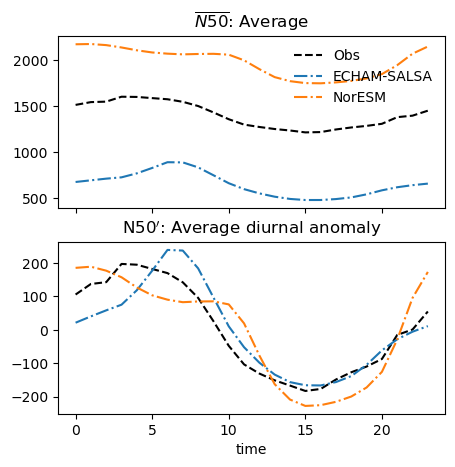

In [85]:
fig, axs = plt.subplots(2,1, sharex=True, figsize=[5,5], dpi=100)
ax = axs[1]
#pl_obs = df_anom_OA['Obs'].groupby(df_anom_OA['obs'].index.hour).mean()
#pl_obs.plot(ax=ax,label='Observations', c='k')
vn = 'N50'

df_plot = dic_df_Nx_anom[vn]

df_plot2 = dic_df_Nx[vn]

for mod in df_plot.columns:
    if mod =='Obs': c = 'k'
    else: c=None
    ls = linestyle_dic[mod]
    df_plot[mod].groupby(df_plot.index.hour).mean().plot(ax=ax,c=c,
                                                               linestyle=ls,
                                                               label=mod)#'OsloAeroSec',)# c='k')
ax.set_title(f"{vn}$'$: Average diurnal anomaly") 

#ax.legend(frameon=False)


ax = axs[0]


for mod in df_plot2.columns:
    if mod =='Obs': c = 'k'
    else: c=None
    ls = linestyle_dic[mod]
    df_plot2[mod].groupby(df_plot2.index.hour).mean().plot(ax=ax,c=c,
                                                               linestyle=ls,
                                                               label=mod)#'OsloAeroSec',)# c='k')
ax.legend(frameon=False)
ax.set_title("$\overline{%s}$: Average"%vn) 
#ax.set_ylim([0,9])'

fn = make_fn_eval('_'.join(models)+vn, 'diurnal_var')

fig.savefig(fn.with_suffix('.png'))
fig.savefig(fn.with_suffix('.pdf'))

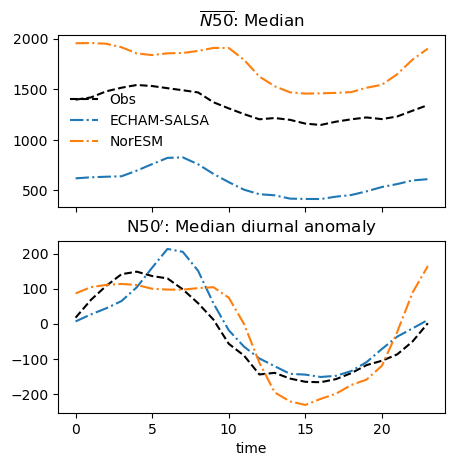

In [86]:
fig, axs = plt.subplots(2,1, sharex=True, figsize=[5,5], dpi=100)
ax = axs[1]
#pl_obs = df_anom_OA['Obs'].groupby(df_anom_OA['obs'].index.hour).mean()
#pl_obs.plot(ax=ax,label='Observations', c='k')
vn = 'N50'

df_plot = dic_df_Nx_anom[vn]

df_plot2 = dic_df_Nx[vn]

for mod in df_plot.columns:
    if mod =='Obs': c = 'k'
    else: c=None
    ls = linestyle_dic[mod]
    df_plot[mod].groupby(df_plot.index.hour).median().plot(ax=ax,c=c,
                                                               linestyle=ls,
                                                               label=mod)#'OsloAeroSec',)# c='k')
ax.set_title(f"{vn}$'$: Median diurnal anomaly") 

#ax.legend(frameon=False)


ax = axs[0]


for mod in df_plot2.columns:
    if mod =='Obs': c = 'k'
    else: c=None
    ls = linestyle_dic[mod]
    df_plot2[mod].groupby(df_plot2.index.hour).median().plot(ax=ax,c=c,
                                                               linestyle=ls,
                                                               label=mod)#'OsloAeroSec',)# c='k')
ax.legend(frameon=False)
ax.set_title("$\overline{%s}$: Median"%vn) 
#ax.set_ylim([0,9])'

fn = make_fn_eval('_'.join(models)+vn, 'diurnal_var')

fig.savefig(fn.with_suffix('.png'))
fig.savefig(fn.with_suffix('.pdf'))

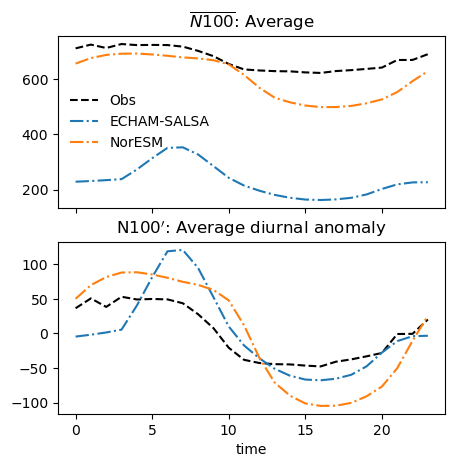

In [87]:
fig, axs = plt.subplots(2,1, sharex=True, figsize=[5,5], dpi=100)
ax = axs[1]
#pl_obs = df_anom_OA['Obs'].groupby(df_anom_OA['obs'].index.hour).mean()
#pl_obs.plot(ax=ax,label='Observations', c='k')
vn = 'N100'

df_plot = dic_df_Nx_anom[vn]

df_plot2 = dic_df_Nx[vn]

for mod in df_plot.columns:
    if mod =='Obs': c = 'k'
    else: c=None
    ls = linestyle_dic[mod]
    df_plot[mod].groupby(df_plot.index.hour).mean().plot(ax=ax,c=c,
                                                               linestyle=ls,
                                                               label=mod)#'OsloAeroSec',)# c='k')
ax.set_title(f"{vn}$'$: Average diurnal anomaly") 
#ax.legend(frameon=False)


ax = axs[0]


for mod in df_plot2.columns:
    if mod =='Obs': c = 'k'
    else: c=None
    ls = linestyle_dic[mod]
    df_plot2[mod].groupby(df_plot2.index.hour).mean().plot(ax=ax,c=c,
                                                               linestyle=ls,
                                                               label=mod)#'OsloAeroSec',)# c='k')
ax.legend(frameon=False)
ax.set_title("$\overline{%s}$: Average"%vn) 
#ax.set_ylim([0,9])'

fn = make_fn_eval('_'.join(models)+vn, 'diurnal_var')

fig.savefig(fn.with_suffix('.png'))
fig.savefig(fn.with_suffix('.pdf'))

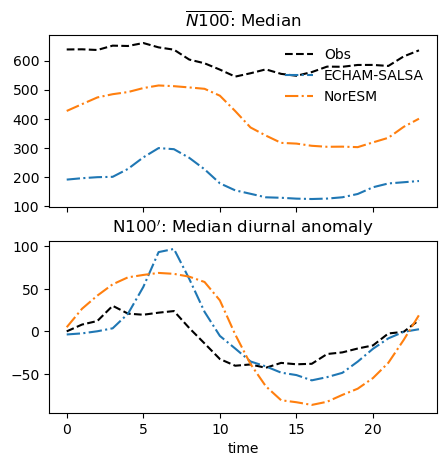

In [88]:
fig, axs = plt.subplots(2,1, sharex=True, figsize=[5,5], dpi=100)
ax = axs[1]
#pl_obs = df_anom_OA['Obs'].groupby(df_anom_OA['obs'].index.hour).mean()
#pl_obs.plot(ax=ax,label='Observations', c='k')
vn = 'N100'

df_plot = dic_df_Nx_anom[vn]

df_plot2 = dic_df_Nx[vn]

for mod in df_plot.columns:
    if mod =='Obs': c = 'k'
    else: c=None
    ls = linestyle_dic[mod]
    df_plot[mod].groupby(df_plot.index.hour).median().plot(ax=ax,c=c,
                                                               linestyle=ls,
                                                               label=mod)#'OsloAeroSec',)# c='k')
ax.set_title(f"{vn}$'$: Median diurnal anomaly") 
#ax.legend(frameon=False)


ax = axs[0]


for mod in df_plot2.columns:
    if mod =='Obs': c = 'k'
    else: c=None
    ls = linestyle_dic[mod]
    df_plot2[mod].groupby(df_plot2.index.hour).median().plot(ax=ax,c=c,
                                                               linestyle=ls,
                                                               label=mod)#'OsloAeroSec',)# c='k')
ax.legend(frameon=False)
ax.set_title("$\overline{%s}$: Median"%vn) 
#ax.set_ylim([0,9])'

fn = make_fn_eval('_'.join(models)+vn, 'diurnal_var_median')

fig.savefig(fn.with_suffix('.png'))
fig.savefig(fn.with_suffix('.pdf'))

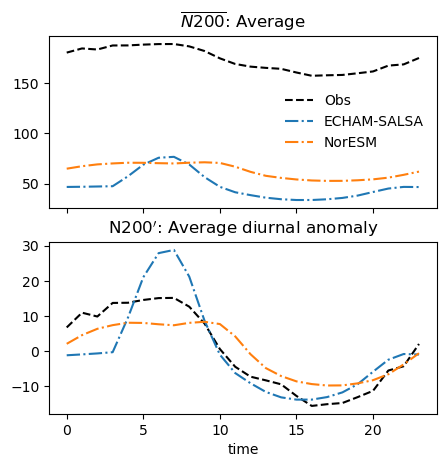

In [89]:
fig, axs = plt.subplots(2,1, sharex=True, figsize=[5,5], dpi=100)
ax = axs[1]
#pl_obs = df_anom_OA['Obs'].groupby(df_anom_OA['obs'].index.hour).mean()
#pl_obs.plot(ax=ax,label='Observations', c='k')
vn = 'N200'

df_plot = dic_df_Nx_anom[vn]

df_plot2 = dic_df_Nx[vn]

for mod in df_plot.columns:
    if mod =='Obs': c = 'k'
    else: c=None
    ls = linestyle_dic[mod]
    df_plot[mod].groupby(df_plot.index.hour).mean().plot(ax=ax,c=c,
                                                               linestyle=ls,
                                                               label=mod)#'OsloAeroSec',)# c='k')
ax.set_title(f"{vn}$'$: Average diurnal anomaly") 

#ax.legend(frameon=False)


ax = axs[0]


for mod in df_plot2.columns:
    if mod =='Obs': c = 'k'
    else: c=None
    ls = linestyle_dic[mod]
    df_plot2[mod].groupby(df_plot2.index.hour).mean().plot(ax=ax,c=c,
                                                               linestyle=ls,
                                                               label=mod)#'OsloAeroSec',)# c='k')
ax.legend(frameon=False)
ax.set_title("$\overline{%s}$: Average"%vn) 
#ax.set_ylim([0,9])'

fn = make_fn_eval('_'.join(models)+vn, 'diurnal_var')

fig.savefig(fn.with_suffix('.png'))
fig.savefig(fn.with_suffix('.pdf'))

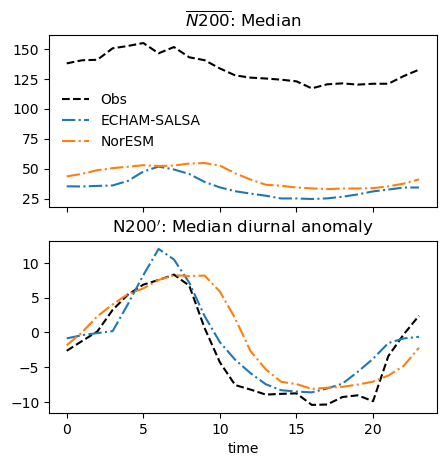

In [90]:
fig, axs = plt.subplots(2,1, sharex=True, figsize=[5,5], dpi=100)
ax = axs[1]
#pl_obs = df_anom_OA['Obs'].groupby(df_anom_OA['obs'].index.hour).mean()
#pl_obs.plot(ax=ax,label='Observations', c='k')
vn = 'N200'

df_plot = dic_df_Nx_anom[vn]

df_plot2 = dic_df_Nx[vn]

for mod in df_plot.columns:
    if mod =='Obs': c = 'k'
    else: c=None
    ls = linestyle_dic[mod]
    df_plot[mod].groupby(df_plot.index.hour).median().plot(ax=ax,c=c,
                                                               linestyle=ls,
                                                               label=mod)#'OsloAeroSec',)# c='k')
ax.set_title(f"{vn}$'$: Median diurnal anomaly") 

#ax.legend(frameon=False)


ax = axs[0]


for mod in df_plot2.columns:
    if mod =='Obs': c = 'k'
    else: c=None
    ls = linestyle_dic[mod]
    df_plot2[mod].groupby(df_plot2.index.hour).median().plot(ax=ax,c=c,
                                                               linestyle=ls,
                                                               label=mod)#'OsloAeroSec',)# c='k')
ax.legend(frameon=False)
ax.set_title("$\overline{%s}$: Median"%vn) 
#ax.set_ylim([0,9])'

fn = make_fn_eval('_'.join(models)+vn, 'diurnal_var_median')

fig.savefig(fn.with_suffix('.png'))
fig.savefig(fn.with_suffix('.pdf'))

<AxesSubplot:xlabel='time'>

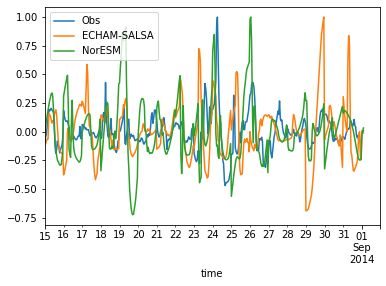

In [91]:
     
(df_plot.loc['2014-08-15':'2014-09-01']/df_plot.loc['2014-08-15':'2014-09-01'].max()).plot()

(-100.0, 100.0)

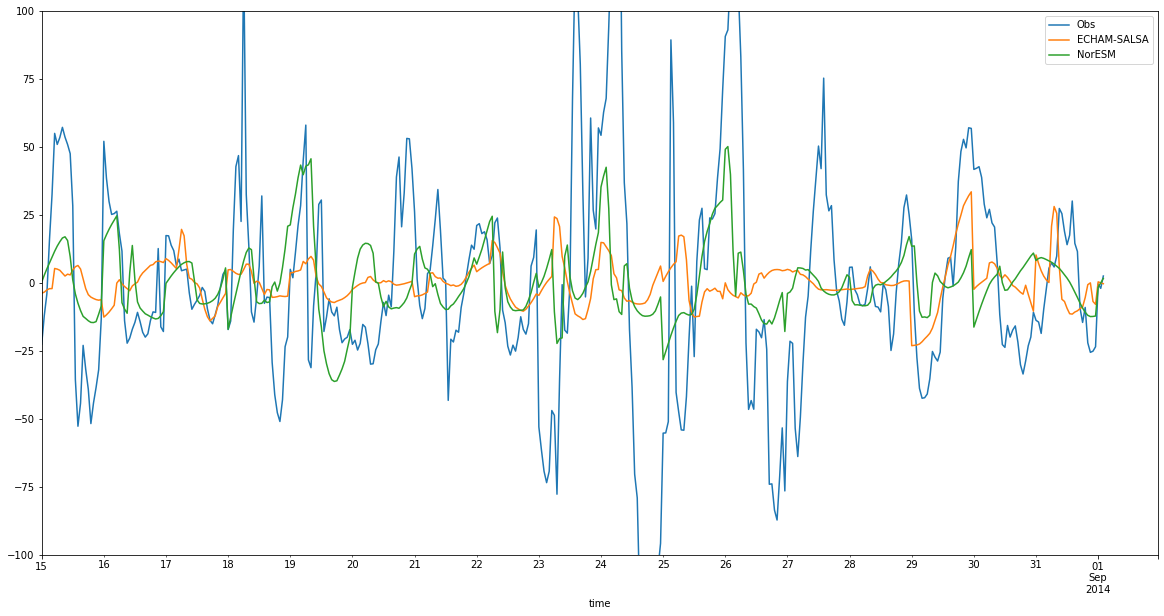

In [92]:
     
f, ax = plt.subplots(figsize=[20,10])
df_plot.loc['2014-08-15':'2014-09-01'].plot(ax = ax)
ax.set_ylim([-100,100])

In [93]:
vn

'N200'

(0.0, 200.0)

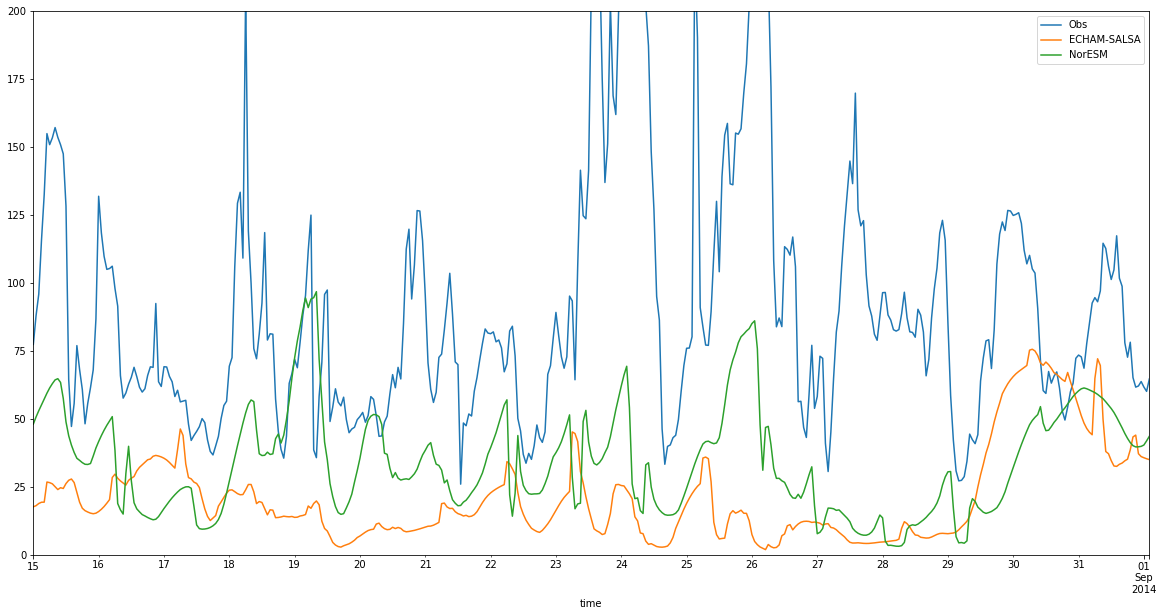

In [94]:
     
f, ax = plt.subplots(figsize=[20,10])
df_plot2.loc['2014-08-15':'2014-09-01'].plot(ax = ax)
ax.set_ylim([0,200])

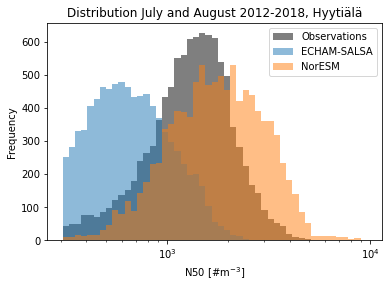

In [95]:
vn = 'N50'

df_plot = dic_df_Nx[vn]




mi = np.min(df_plot[df_plot['Obs']>0]['Obs'])*10
ma = np.max(df_plot[df_plot['Obs']>0]['Obs'])*1
bins_ = 10 ** np.linspace(np.log10(mi), np.log10(ma), 50)

df_plot['Obs'].plot.hist(bins=bins_, alpha=0.5, 
                                     color='k',
                                     label='Observations'
                                    )
for mo in models:
    df_plot[mo].plot.hist(bins=bins_, alpha=0.5, 
                                     #color=None,
                                     label=mo
                                    )
plt.xscale('log')
#_mod_an.plot.hist(bins=bins_, alpha=0.5,label='OsloAero, SOA')

plt.xlabel('%s [#m$^{-3}$]'%vn)

plt.title('Distribution July and August 2012-2018, Hyytiälä')

plt.legend()
fn = make_fn_eval('noresm_echam_'+vn,'hist')
plt.savefig(fn, dpi=300)
plt.savefig(fn.with_suffix('.pdf'), dpi=300)
plt.show()

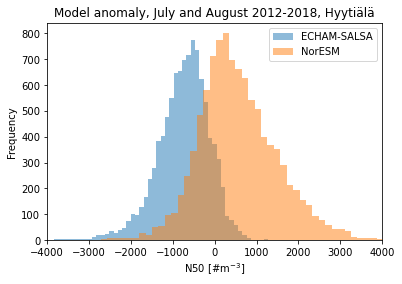

In [96]:
vn = 'N50'

df_plot = dic_df_Nx[vn]



for mo in models:
    (df_plot[mo]-df_plot['Obs']).plot.hist(#bins=bins_, 
        alpha=0.5, 
        bins=100,
                                     #color=None,
                                     label=mo
                                    )
#plt.xscale('log')
#_mod_an.plot.hist(bins=bins_, alpha=0.5,label='OsloAero, SOA')
plt.xlim([-4e3,4e3])
plt.xlabel('%s [#m$^{-3}$]'%vn)

plt.title('Model anomaly, July and August 2012-2018, Hyytiälä')

plt.legend()
fn = make_fn_eval('diff_hist_'+vn,'hist')
plt.savefig(fn, dpi=300)
plt.savefig(fn.with_suffix('.pdf'), dpi=300)

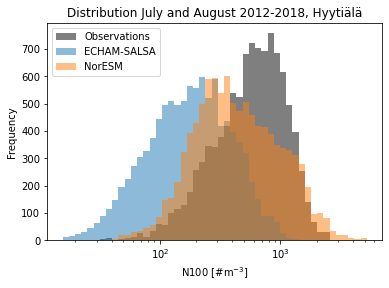

In [97]:
vn = 'N100'

df_plot = dic_df_Nx[vn]




mi = np.min(df_plot[df_plot['Obs']>0]['Obs'])*1
ma = np.max(df_plot[df_plot['Obs']>0]['Obs'])*1
bins_ = 10 ** np.linspace(np.log10(mi), np.log10(ma), 50)

df_plot['Obs'].plot.hist(bins=bins_, alpha=0.5, 
                                     color='k',
                                     label='Observations'
                                    )
for mo in models:
    df_plot[mo].plot.hist(bins=bins_, alpha=0.5, 
                                     #color=None,
                                     label=mo
                                    )
plt.xscale('log')
#_mod_an.plot.hist(bins=bins_, alpha=0.5,label='OsloAero, SOA')

plt.xlabel('%s [#m$^{-3}$]'%vn)

plt.title('Distribution July and August 2012-2018, Hyytiälä')

plt.legend()
fn = make_fn_eval('noresm_echam_'+vn,'hist')
plt.savefig(fn, dpi=300)
plt.savefig(fn.with_suffix('.pdf'), dpi=300)
plt.show()

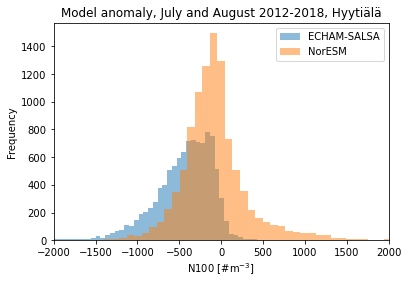

In [98]:
vn = 'N100'

df_plot = dic_df_Nx[vn]



for mo in models:
    (df_plot[mo]-df_plot['Obs']).plot.hist(#bins=bins_, 
        alpha=0.5, 
        bins=100,
                                     #color=None,
                                     label=mo
                                    )
#plt.xscale('log')
#_mod_an.plot.hist(bins=bins_, alpha=0.5,label='OsloAero, SOA')
plt.xlim([-2e3,2e3])
plt.xlabel('%s [#m$^{-3}$]'%vn)

plt.title('Model anomaly, July and August 2012-2018, Hyytiälä')

plt.legend()
fn = make_fn_eval('diff_hist_'+vn,'hist')
plt.savefig(fn, dpi=300)
plt.savefig(fn.with_suffix('.pdf'), dpi=300)

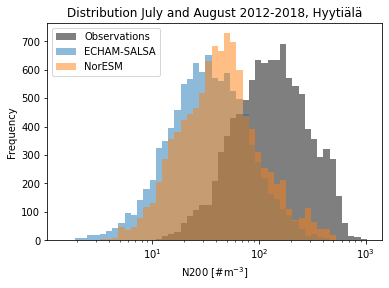

In [99]:
vn = 'N200'

df_plot = dic_df_Nx[vn]




mi = np.min(df_plot[df_plot['Obs']>0]['Obs'])*2e-1
ma = np.max(df_plot[df_plot['Obs']>0]['Obs'])*1
bins_ = 10 ** np.linspace(np.log10(mi), np.log10(ma), 50)

df_plot['Obs'].plot.hist(bins=bins_, alpha=0.5, 
                                     color='k',
                                     label='Observations'
                                    )
for mo in models:
    df_plot[mo].plot.hist(bins=bins_, alpha=0.5, 
                                     #color=None,
                                     label=mo
                                    )
plt.xscale('log')
#_mod_an.plot.hist(bins=bins_, alpha=0.5,label='OsloAero, SOA')

plt.xlabel('%s [#m$^{-3}$]'%vn)

plt.title('Distribution July and August 2012-2018, Hyytiälä')

plt.legend()
fn = make_fn_eval('noresm_echam_'+vn,'hist')
plt.savefig(fn, dpi=300)
plt.savefig(fn.with_suffix('.pdf'), dpi=300)
plt.show()

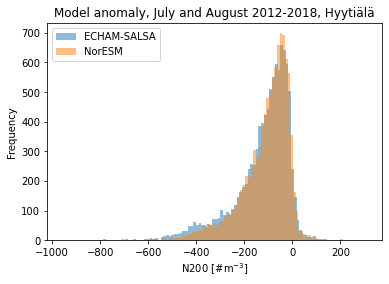

In [100]:
vn = 'N200'

df_plot = dic_df_Nx[vn]



for mo in models:
    (df_plot[mo]-df_plot['Obs']).plot.hist(#bins=bins_, 
        alpha=0.5, 
        bins=100,
                                     #color=None,
                                     label=mo
                                    )
#plt.xscale('log')
#_mod_an.plot.hist(bins=bins_, alpha=0.5,label='OsloAero, SOA')
#plt.xlim([-2.5e2,2.5e2])
plt.xlabel('%s [#m$^{-3}$]'%vn)

plt.title('Model anomaly, July and August 2012-2018, Hyytiälä')

plt.legend()
fn = make_fn_eval('diff_hist_'+vn,'hist')
plt.savefig(fn, dpi=300)
plt.savefig(fn.with_suffix('.pdf'), dpi=300)

In [101]:
import numpy as np

In [102]:
import seaborn as sns

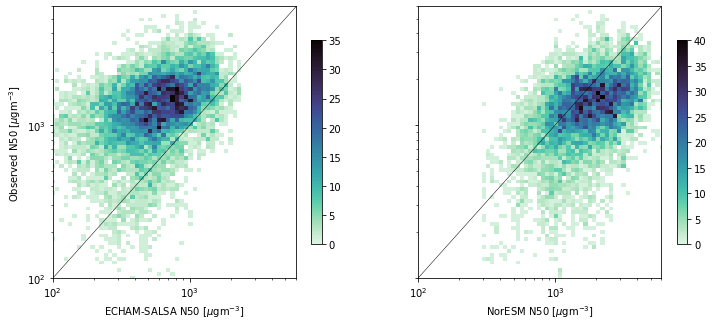

In [554]:
fig, axs = plt.subplots(1,2,sharey=True, figsize=[12,5], sharex= True)

ax = axs[0]
#_df = df_OA_all
vn = 'N50'

_df = dic_df_Nx[vn]


_df['hour'] = _df.index.hour
for mo, ax in zip(models,axs.flatten()):
    sns.histplot(x=mo, y='Obs',#orbins=bins_, alpha=0.5, 
                                    # hue='hour', 
                #col = 'dir',
                ax=ax,
                cmap = sns.color_palette("mako_r", as_cmap=True),
                log_scale=(True, True),
                 cbar=True, cbar_kws=dict(shrink=.75),

                edgecolors=None,
                data = _df)
#ax.set_ylim([0,30])

#ax.set_xlim([0,15])
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_xlim([1e2,6e3])
    ax.set_ylim([1e2,6e3])

    ax.set_xlabel(f'{mo} {vn} '+'[$\mu$gm$^{-3}$]')
    ax.set_ylabel(f'Observed {vn}'+' [$\mu$gm$^{-3}$]')



    lims = ax.get_xlim()
    ax.plot(lims,lims,'k', linewidth=.5)


fn = make_fn_eval('_'.join(models),'scatt_'+vn)
fig.savefig(fn, dpi=300)
fig.savefig(fn.with_suffix('.pdf'), dpi=300)

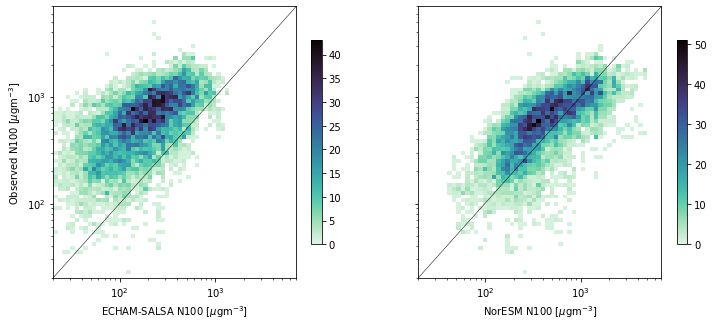

In [557]:
fig, axs = plt.subplots(1,2,sharey=True, figsize=[12,5], sharex= True)
ax = axs[0]
#_df = df_OA_all
vn = 'N100'

_df = dic_df_Nx[vn]


_df['hour'] = _df.index.hour
for mo, ax in zip(models,axs.flatten()):
    sns.histplot(x=mo, y='Obs',#orbins=bins_, alpha=0.5, 
                                     #hue='hour', 
                #col = 'dir',
                ax=ax,
                #alpha=0.4,
                cmap = sns.color_palette("mako_r", as_cmap=True),
                                      cbar=True, cbar_kws=dict(shrink=.75),

                log_scale=(True, True),
                
                #edgecolors=None,
                data = _df)
#ax.set_ylim([0,30])

#ax.set_xlim([0,15])
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_xlim([2e1,7e3])
    ax.set_ylim([2e1,7e3])
    #ax.set_ylim([0.1,30])

    ax.set_xlabel(f'{mo} {vn} '+'[$\mu$gm$^{-3}$]')
    ax.set_ylabel(f'Observed {vn}'+' [$\mu$gm$^{-3}$]')



    lims = ax.get_xlim()
    ax.plot(lims,lims,'k', linewidth=.5)


fn = make_fn_eval('_'.join(models),'scatt_'+vn)
fig.savefig(fn, dpi=300)
fig.savefig(fn.with_suffix('.pdf'), dpi=300)

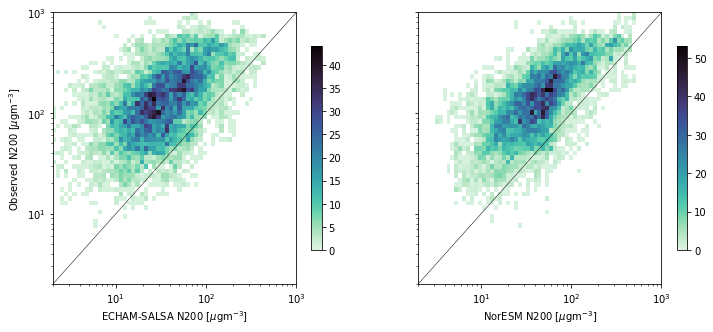

In [559]:
fig, axs = plt.subplots(1,2,sharey=True, figsize=[12,5], sharex= True)
ax = axs[0]
#_df = df_OA_all
vn = 'N200'

_df = dic_df_Nx[vn]


_df['hour'] = _df.index.hour
for mo, ax in zip(models,axs.flatten()):
    sns.histplot(x=mo, y='Obs',#orbins=bins_, alpha=0.5, 
                                     #hue='hour', 
                #col = 'dir',
                ax=ax,
                #alpha=0.4,
                #palette='viridis',
                cmap = sns.color_palette("mako_r", as_cmap=True),
                     cbar=True, cbar_kws=dict(shrink=.75),

                 log_scale=(True, True),
                
                #edgecolors=None,
                data = _df)
#ax.set_ylim([0,30])

#ax.set_xlim([0,15])
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_xlim([2e0,1e3])
    ax.set_ylim([2e0,1e3])
    #ax.set_ylim([0.1,30])

    ax.set_xlabel(f'{mo} {vn} '+'[$\mu$gm$^{-3}$]')
    ax.set_ylabel(f'Observed {vn}'+' [$\mu$gm$^{-3}$]')



    lims = ax.get_xlim()
    ax.plot(lims,lims,'k', linewidth=.5)


fn = make_fn_eval('_'.join(models),'scatt_'+vn)
fig.savefig(fn, dpi=300)
fig.savefig(fn.with_suffix('.pdf'), dpi=300)

In [478]:
vn_list = [f'N{x:d}' for x in x_list]

In [480]:
dic_df_source = {so: pd.DataFrame() for so in dic_df_Nx[vn].columns}

In [482]:
for mo in dic_df_Nx[vn].columns:
    for vn in dic_df_Nx.keys():
        dic_df_source[mo][vn] = dic_df_Nx[vn][mo]

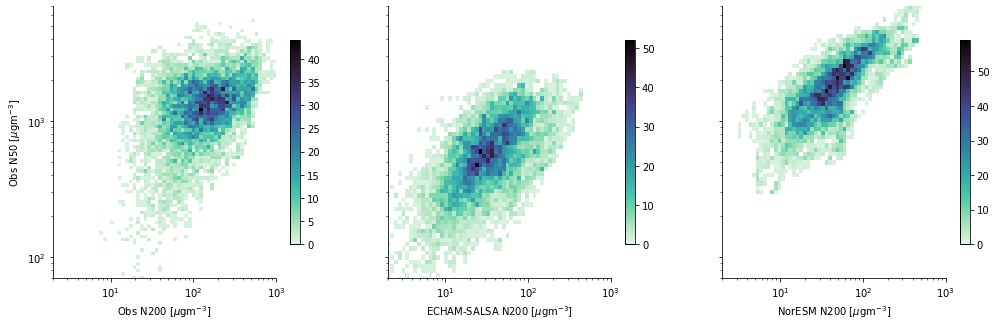

In [560]:
fig, axs = plt.subplots(1,3,sharey=True, figsize=[17,5], sharex= True)

ax = axs[0]
#_df = df_OA_all
vn1 = 'N200'
vn2 = 'N50'
so = 'Obs'


_df['hour'] = _df.index.hour
for so, ax in zip(dic_df_source.keys(), axs):
    _df = dic_df_source[so]
    #cmap = sns.cubehelix_palette(start=1, light=1, as_cmap=True)
    cmap = sns.color_palette("mako_r", as_cmap=True)

    sns.histplot(x=vn1, y=vn2,
                        #hue='hour', 
                ax=ax,
                #alpha=0.4,
                palette='viridis',
                log_scale=(True, True),
                edgecolors=None,
             cmap=cmap, 
                     cbar=True, cbar_kws=dict(shrink=.75),

                fill=True,
        #clip=([1e1, 1e4],[1e1, 1e4],), 
                #cut=10,
        #thresh=0.1, levels=15,
        #ax=ax,

                data = _df)
    #ax.set_yscale('log')
    #ax.set_xscale('log')
    

    ax.set_xlim([2,1e3])
    ax.set_ylim([.7e2,7e3])
    #ax.set_ylim([0.1,30])

    ax.set_xlabel(f'{so} {vn1} '+'[$\mu$gm$^{-3}$]')
    ax.set_ylabel(f'{so} {vn2}'+' [$\mu$gm$^{-3}$]')


    lims = ax.get_xlim()
    #ax.plot(lims,lims,'k', linewidth=.5)


fn = make_fn_eval('_'.join(models),'scatt_'+vn)
#fig.savefig(fn, dpi=300)
#fig.savefig(fn.with_suffix('.pdf'), dpi=300)

sns.despine(fig)

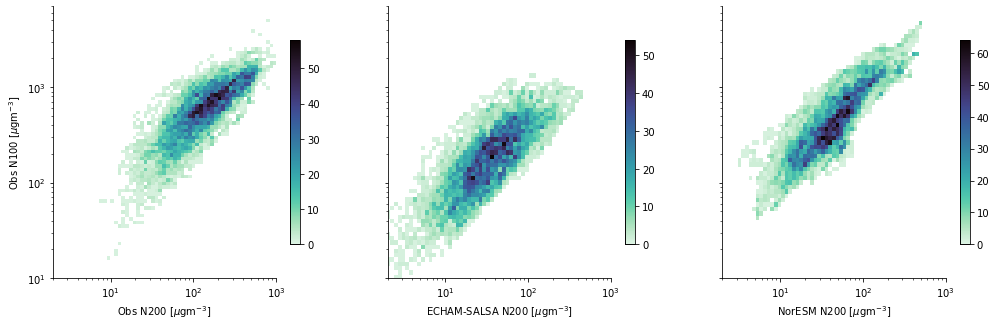

In [561]:
fig, axs = plt.subplots(1,3,sharey=True, figsize=[17,5], sharex= True)

ax = axs[0]
#_df = df_OA_all
vn1 = 'N200'
vn2 = 'N100'
so = 'Obs'


_df['hour'] = _df.index.hour
for so, ax in zip(dic_df_source.keys(), axs):
    _df = dic_df_source[so]
    #cmap = sns.cubehelix_palette(start=1, light=1, as_cmap=True)
    cmap = sns.color_palette("mako_r", as_cmap=True)

    sns.histplot(x=vn1, y=vn2,
                        #hue='hour', 
                ax=ax,
                #alpha=0.4,
                palette='viridis',
                log_scale=(True, True),
                edgecolors=None,
             cmap=cmap, 
                     cbar=True, cbar_kws=dict(shrink=.75),

                fill=True,
        #clip=([1e1, 1e4],[1e1, 1e4],), 
                #cut=10,
        #thresh=0.1, levels=15,
        #ax=ax,

                data = _df)
    #ax.set_yscale('log')
    #ax.set_xscale('log')
    

    ax.set_xlim([2,1e3])
    ax.set_ylim([1e1,7e3])
    #ax.set_ylim([0.1,30])

    ax.set_xlabel(f'{so} {vn1} '+'[$\mu$gm$^{-3}$]')
    ax.set_ylabel(f'{so} {vn2}'+' [$\mu$gm$^{-3}$]')


    lims = ax.get_xlim()
    #ax.plot(lims,lims,'k', linewidth=.5)


fn = make_fn_eval('_'.join(models),'scatt_'+vn)
#fig.savefig(fn, dpi=300)
#fig.savefig(fn.with_suffix('.pdf'), dpi=300)

sns.despine(fig)

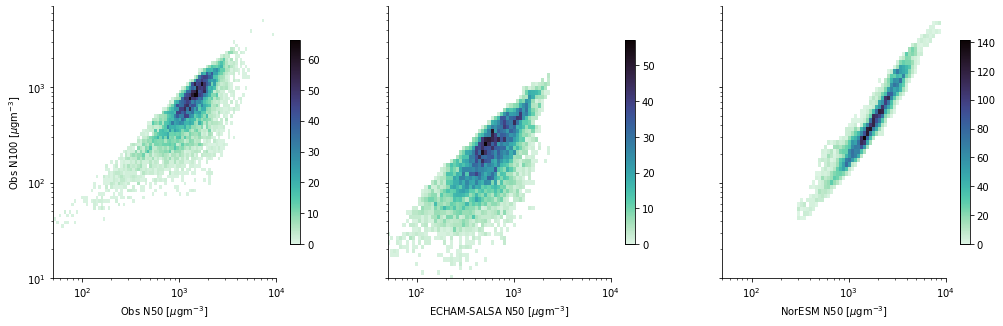

In [562]:
fig, axs = plt.subplots(1,3,sharey=True, figsize=[17,5], sharex= True)

ax = axs[0]
#_df = df_OA_all
vn1 = 'N50'
vn2 = 'N100'
so = 'Obs'


_df['hour'] = _df.index.hour
for so, ax in zip(dic_df_source.keys(), axs):
    _df = dic_df_source[so]
    #cmap = sns.cubehelix_palette(start=1, light=1, as_cmap=True)
    cmap = sns.color_palette("mako_r", as_cmap=True)

    sns.histplot(x=vn1, y=vn2,
                        #hue='hour', 
                ax=ax,
                #alpha=0.4,
                palette='viridis',
                log_scale=(True, True),
                edgecolors=None,
             cmap=cmap, 
                     cbar=True, cbar_kws=dict(shrink=.75),

                fill=True,
        #clip=([1e1, 1e4],[1e1, 1e4],), 
                #cut=10,
        #thresh=0.1, levels=15,
        #ax=ax,

                data = _df)
    #ax.set_yscale('log')
    #ax.set_xscale('log')
    

    ax.set_xlim([5e1,1e4])
    ax.set_ylim([1e1,7e3])
    #ax.set_ylim([0.1,30])

    ax.set_xlabel(f'{so} {vn1} '+'[$\mu$gm$^{-3}$]')
    ax.set_ylabel(f'{so} {vn2}'+' [$\mu$gm$^{-3}$]')


    lims = ax.get_xlim()
    #ax.plot(lims,lims,'k', linewidth=.5)


fn = make_fn_eval('_'.join(models),'scatt_'+vn)
#fig.savefig(fn, dpi=300)
#fig.savefig(fn.with_suffix('.pdf'), dpi=300)

sns.despine(fig)